In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy as gp
import us as us
%matplotlib inline

In [241]:
ms = pd.DataFrame(pd.read_csv('C:/Users/aweissma/Desktop/projects/Mass Shootings Dataset Ver 10.csv', encoding = 'latin-1'))

# **US Mass Shooting Analysis**
Over the past decade, a frequent number of highliy publicized and horrific gun-related shootings involving numerous victims have befallen the United States. The data set includes data for shootings dating back to 1966, and includes information for date, location, injuries, fatalities, mental health of offenders, and race.

> ## Part I: What Is The Trend Of US Mass Shootings Over The Past 10 Years?
 1. What is the year with the highest number of incidents? Highest victim count as result of these public mass shootings?
 2. Does time of year account for the frequency of mass shootings?

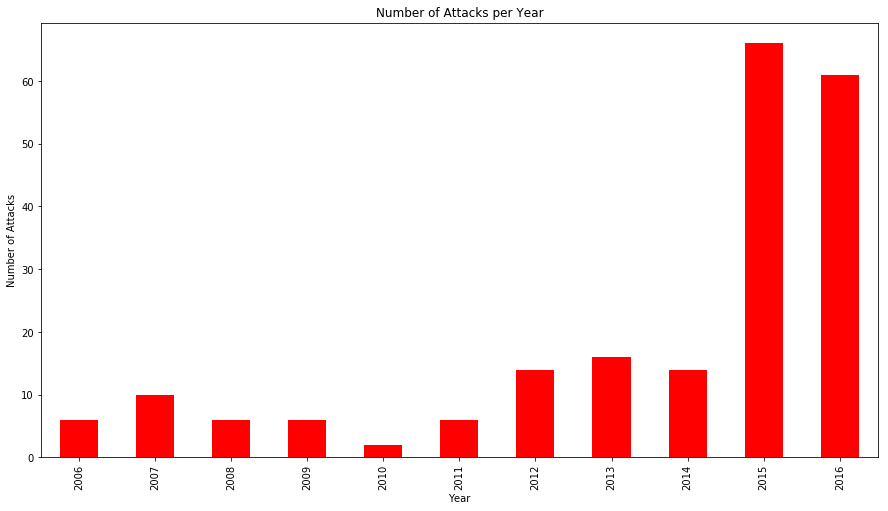

In [247]:
ms = pd.DataFrame(ms[(ms['Date'] >= '2006-01-01') & (ms['Date'] < '2017-01-01')])
ms['Date'] = pd.to_datetime(ms['Date'])
ms['Year'] = ms['Date'].dt.year
ms = ms.sort_values('Year')
ms.set_index('Year', inplace=True)
ms.reset_index(level=0, inplace=True)
plt.figure(figsize=(15,8))
ms.Year.value_counts().sort_index().plot.bar(color='r')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks per Year')
plt.show()

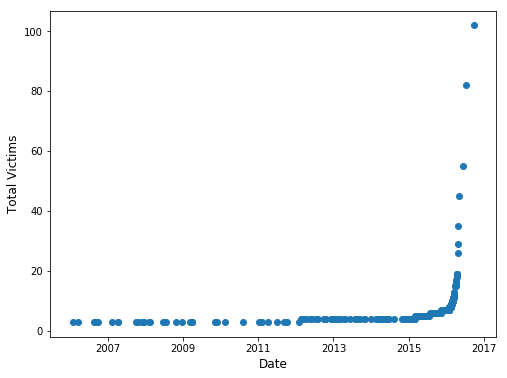

In [248]:
plt.figure(figsize=(8,6))
plt.scatter(np.sort(ms['Date']), np.sort(ms['Total_victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.show()

**It is evident there is a sharp increase in attacks and number of victims in 2015 and 2016. Let's dig in deeper.**

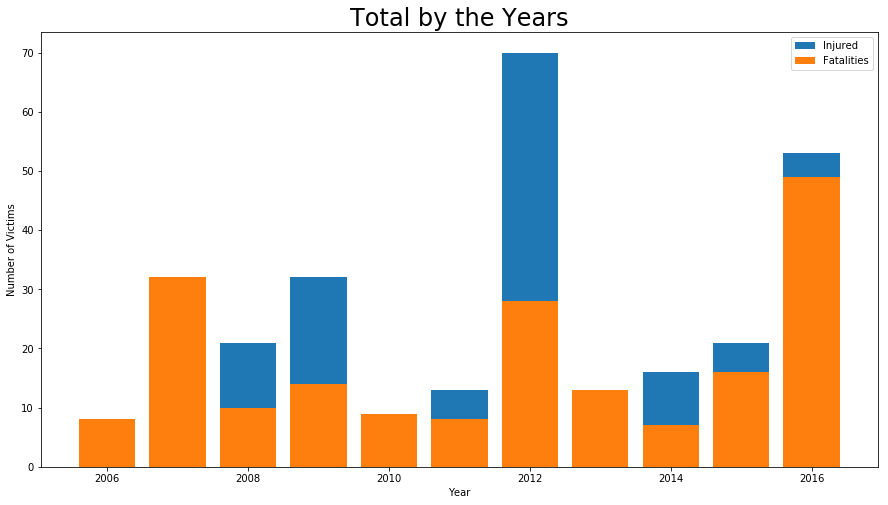

In [249]:
plt.figure(figsize=(15,8))

plot1 = plt.bar(ms['Year'], ms['Injured'], label = 'Injured')
plot2 = plt.bar(ms['Year'], ms['Fatalities'], label = 'Fatalities')
plt.title('Total by the Years', fontsize=24)
plt.ylabel('Number of Victims')
plt.xlabel('Year')
plt.legend()
plt.show()
## Help making more ticks for years

From 2006-2016 in the U.S., **there have been 207 mass shootings.** These incidents resulted in 1,611 victims shot: **812 people were shot and killed, and 860 people were shot and injured.**

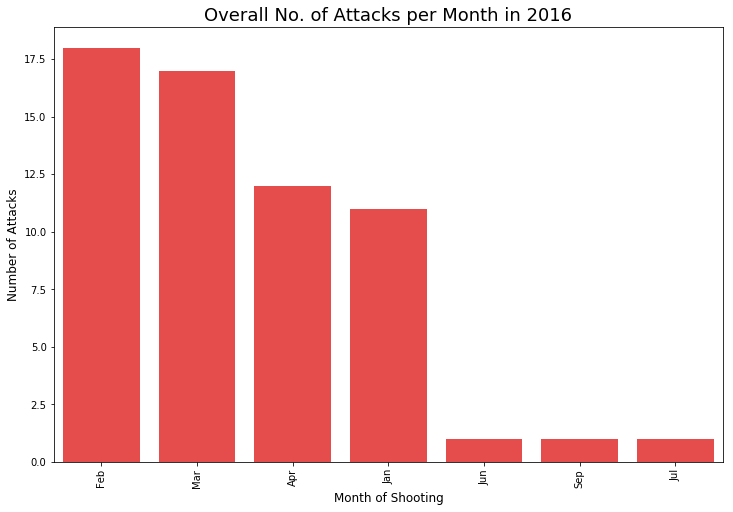

In [142]:
ms_all = ms.copy()
ms_2016 = ms_all[ms_all.Year == 2016]
ms_all = ms_all[ms_all.Year != 2016]
ms_2016['Month'] = ms_2016['Date'].dt.month
import calendar
ms_2016['Month'] = ms_2016['Month'].apply(lambda x: calendar.month_abbr[x])


cnt_Mth = ms_2016['Month'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_Mth.index, cnt_Mth.values, alpha=0.8, color='r')
plt.xticks(rotation='vertical')
plt.xlabel('Month of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Month in 2016', fontsize=18)
plt.show()

# How to order these?

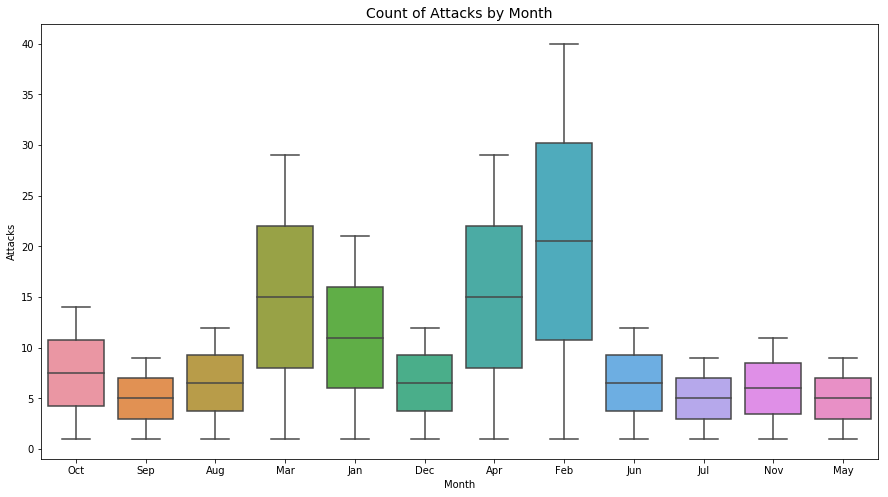

In [250]:
plt.figure(figsize=(15,8))
sns.boxplot(ms['Month'], ms['Cnt_Mth'])
plt.xlabel('Month')
plt.ylabel('Attacks')
plt.title('Count of Attacks by Month', fontsize=14)
plt.show()

**February is the month with the most attacks both pre 2016 and in 2016. This should be further analyzed to see if we can draw any correlations.**

In [323]:
ms1 = ms.drop(['Cnt_Mth', 'Month','Year', 'Incident_Area','Title', 'Open/Close_Location', 'Target', 'Cause', 'Summary', 'Employed_at'], axis=1)
ms1.duplicated()
ms2 = ms1.drop_duplicates()

ms2['Total victims'] = ms2['Fatalities'] + ms['Injured']
ms2['Total victims'] = ms2['Total victims'].astype(int)

ms2.head()

,Date,Location,Fatalities,Injured,Total_victims,Age,Employeed_(Y/N),Mental_Health_Issues,Race,Gender,Latitude,Longitude,Total victims
0,2006-10-02,"Lancaster County, Pennsylvania",6.0,5.0,11.0,32,0.0,No,White,Male,39.9589,-76.0806,11
1,2006-09-17,"Pittsburgh, Pennsylvania",0.0,5.0,5.0,18,0.0,Unknown,Black,Male,40.43948548,-79.97631581,5
2,2006-08-30,"Hillsborough, North Carolina",1.0,2.0,3.0,18,0.0,Yes,Other,Male,36.04099857,-79.09701201,3
3,2006-03-25,"Seattle, Washington",7.0,2.0,9.0,28,0.0,No,White,Male,47.6229,-122.3165,9
4,2006-01-30,"Goleta, California",8.0,0.0,7.0,44,1.0,Yes,White,Female,34.43606107,-119.8593619,8


In [324]:
ms3 = ms2.copy()

from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in ms3.columns:
    ms3[col] = labelencoder.fit_transform(ms3[col].astype(str))
ms3.head()

,Date,Location,Fatalities,Injured,Total_victims,Age,Employeed_(Y/N),Mental_Health_Issues,Race,Gender,Latitude,Longitude,Total victims
0,5,85,15,15,2,18,0,0,5,1,127,59,3
1,4,130,0,15,16,4,0,1,1,1,132,83,18
2,3,67,1,9,12,4,0,2,4,1,84,77,13
3,1,149,16,9,22,16,0,0,5,1,179,37,24
4,0,56,17,0,19,28,1,2,5,0,66,30,22


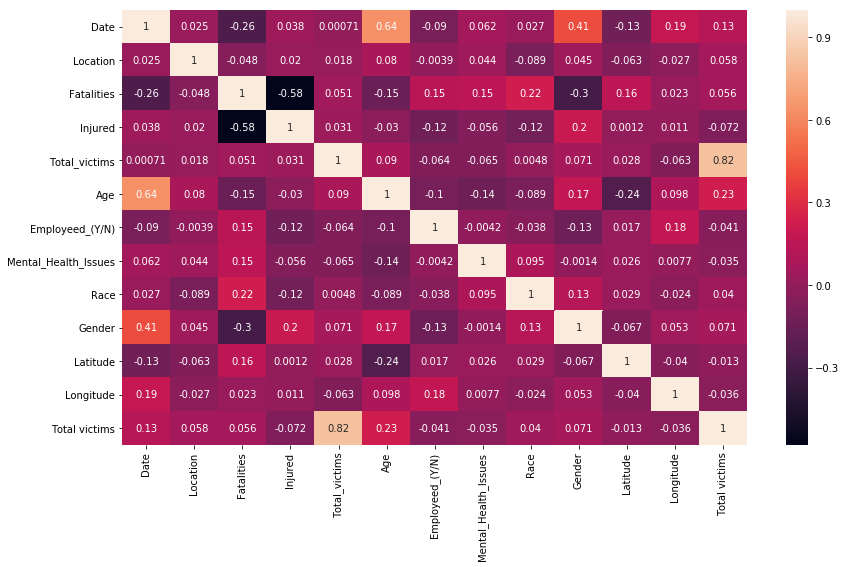

In [325]:
plt.figure(figsize=(14,8))
sns.heatmap(ms3.corr(),annot=True)
plt.show()

From the above Corralation map we can see Race and Fatality, Race and Injured, Race and Total Victim are corralated. Another Corralation that stands out for me is Mental Health Issues which is coralted with Race, Total Victims, Injured.

> ## Part II: Similiarities In Public Mass Shootings.
1. Are there trending characteristics in public shooting incidents when focusing on offenders, settings, general methods or typologies?

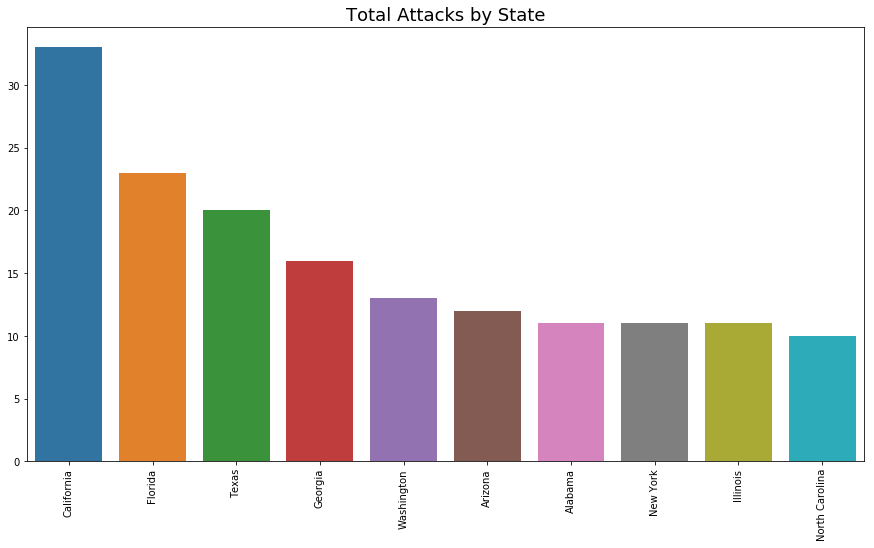

In [145]:
ms['city'] = ms.Location.str.split(',').str.get(0)
ms['state'] = ms.Location.str.split(',').str.get(1)
ms['state'] = ms['state'].replace({' Texas': 'Texas',' Arizona': 'Arizona',' Washington': 'Washington',' Louisiana': 'Louisiana',
                                   ' New York': 'New York', ' Illinois': 'Illinois',' California': 'California',
                                   ' South Carolina':  'South Carolina', ' Nevada': 'Nevado',' Florida': 'Florida',
                                   ' Georgia': 'Georgia',' Kansas': 'Kansas', ' Oklahoma': 'Oklahoma',' Montana': 'Montana',
                                   ' Kentucky': 'Kentucky', ' New Jersey': 'New Jersey',' Michigan': 'Michigan',' Iowa': 'Iowa',
                                   ' Massachusetts': 'Massachusetts',' North Carolina': 'North Carolina',' Utah': 'Utah',
                                   ' Colorado': 'Colorado',' Wyoming': 'Wyoming',' Ohio': 'Ohio',' Tennessee': 'Tennessee',
                                   ' Wisconsin': 'Wisconsin',' Alaska': 'Alaska',' Mississippi': 'Mississippi',
                                   ' Connecticut': 'Connecticut',' Pennsylvania': 'Pennsylvania',' Oregon': 'Oregon',
                                   ' Hawaii': 'Hawaii',' Virginia': 'Virginia', ' Minnesota': 'Minnesota',' Vermont': 'Vermont',
                                   ' Nebraska': 'Nebraska', ' Missouri': 'Missouri', ' Alabama': 'Alabama',' CA' : 'California',
                                   ' New Mexico': 'New Mexico', ' West Virginia': 'West Virginia',  ' Idaho': 'Idaho', 
                                   ' Indiana': 'Indiana',' South Dakota': 'South Dakota',' Maine': 'Maine', 
                                   '  Virginia': 'Virginia', ' Texas ': 'Texas' ,' Maryland': 'Maryland','Texas ': 'Texas',
                                   ' San Diego': 'California',' Lancaster': 'Pennsylvania',' Albuquerque': 'New Mexico',
                                   ' Souderton': 'Pennsylvania',' WA': 'Washington',' LA': 'Louisiana',' Delaware': 'Delaware',
                                   ' florida': 'Florida',' CO': 'Colorado',' MD': 'Maryland',' NV': 'Nevada',
                                  ' PA': 'Pennsylvania',' TX': 'Texas'})

countState = ms['state'].value_counts()
countState = countState.head(10)
plt.figure(figsize=(15,8))
sns.barplot(countState.index, countState.values)
plt.xticks(rotation='vertical')
plt.title('Total Attacks by State', fontsize=18)
plt.show()

# Error bars?

**California, Florida and Texas are the top three states where shooting incidents are highest. California, Florida and Texas are also the top 3 highest populated states in the United States**

In [146]:
# top_area = pd.DataFrame(ms.groupby(['DoW'])['Incident_Area'].count())
# top_area.reset_index(level=0, inplace=True)
# top_area

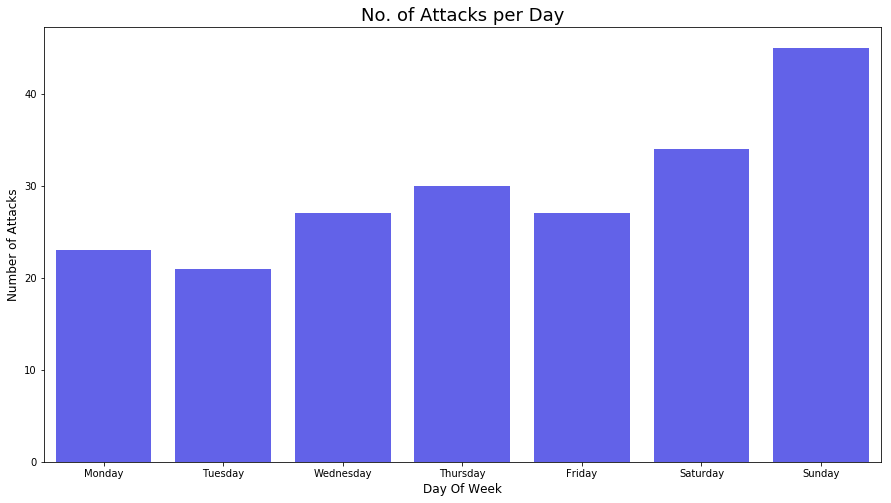

In [175]:
# Number of Attacks per weekday
post['DoW'] = post['Date'].dt.dayofweek
cntDay = post['DoW'].value_counts()
plt.figure(figsize=(15,8))
cntDay = (cntDay.sort_index())
cntDay.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(cntDay.index, cntDay.values, alpha=0.7, color='blue')

plt.xlabel('Day Of Week', fontsize=12)  # fontsize and label
plt.ylabel('Number of Attacks', fontsize=12)  # fontsize and label
plt.title('No. of Attacks per Day', fontsize=18) # fontsize and label
plt.show()


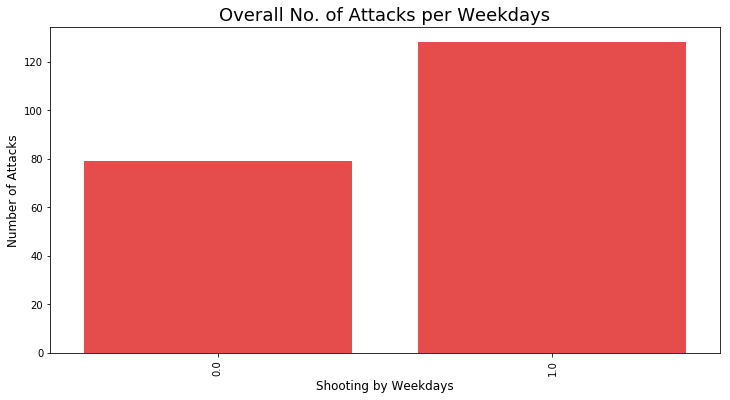

In [204]:
post['weekdayflg'] =( post['DoW'] // 5 != 1).astype(float)

cnt_srs = post['weekdayflg'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Weekdays', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Weekdays', fontsize=18)
plt.show()

**Number of attacks are ~3 times higher on weekdays compared to weekends. Does this have something to do with location? Schools are in session on weekdays, so likely are Incidents in Schools?**

****NEED HELP ON THIS*****

In [208]:
post.describe()

,Year,Cnt_Mth,Fatalities,Injured,Total_victims,Employeed_(Y/N),DoW,weekdayflg
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2013.681159,11.888889,3.869565,4.067633,7.599034,0.091787,3.444444,0.618357
std,2.861662,9.250674,5.053826,7.126817,10.473665,0.289426,2.025458,0.486967
min,2006.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,2013.000000,5.000000,1.000000,1.000000,4.000000,0.000000,2.000000,0.000000
50%,2015.000000,9.000000,3.000000,3.000000,5.000000,0.000000,4.000000,1.000000
75%,2016.000000,17.000000,5.000000,4.000000,7.500000,0.000000,5.000000,1.000000
max,2016.000000,40.000000,49.000000,70.000000,102.000000,1.000000,6.000000,1.000000


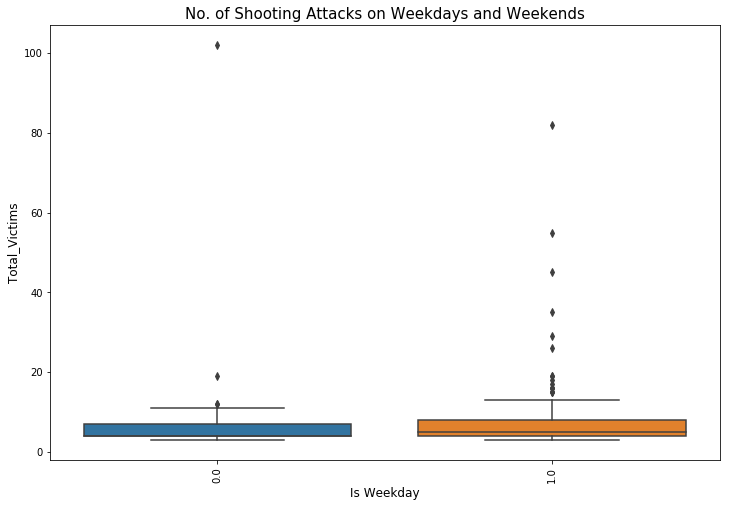

In [206]:
plt.figure(figsize=(12,8))
sns.boxplot(x="weekdayflg", y="Total_victims", data=post[post['Total_victims'] < 500])
plt.ylabel('Total_Victims', fontsize=12)
plt.xlabel('Is Weekday', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No. of Shooting Attacks on Weekdays and Weekends", fontsize=15)
plt.show()   

25% - 75% of victims lie between 4 and 14 on Weekdays and 4 and 9 on Weekends

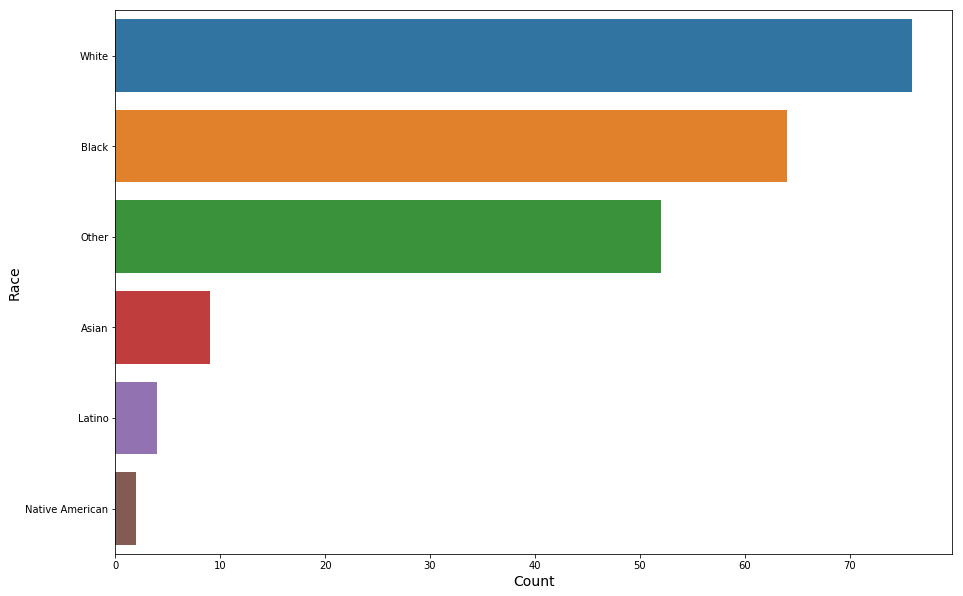

In [232]:
cntRace = post['Race'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(cntRace.values, cntRace.index, orient='h')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.show()

**Gross overall number of shooters are in the White race category**

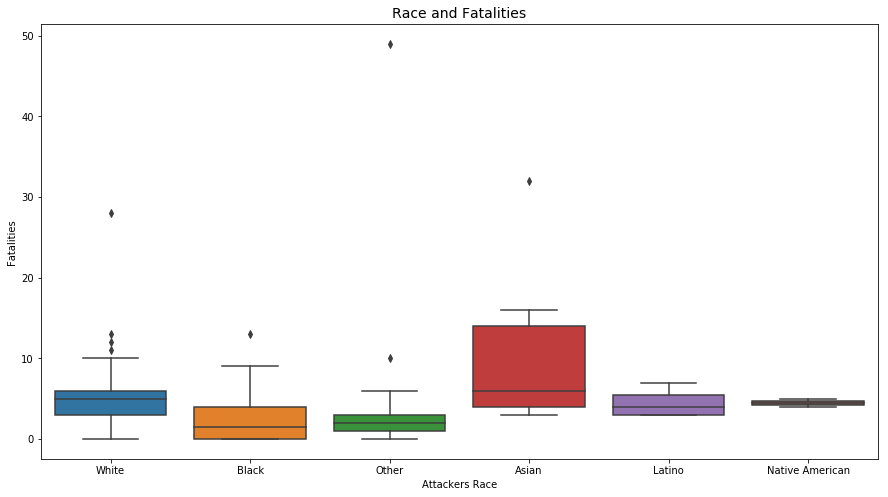

In [230]:
plt.figure(figsize=(15,8))
sns.boxplot(post['Race'], post['Fatalities'])
plt.xlabel('Attackers Race')
plt.title('Race and Fatalities', fontsize=14)
plt.show()

When the gross shooting numbers by race are adjusted for demographics there is no apparent correlation with the race of the shooters.

In [215]:
gender = post['Gender'].value_counts()
gender

Male           179
Unknown         21
Male/Female      4
Female           3
Name: Gender, dtype: int64

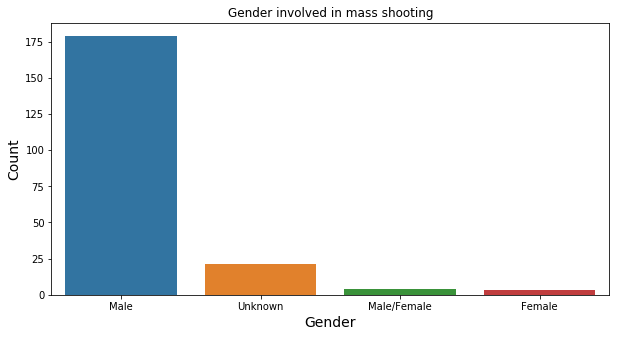

In [211]:
plt.figure(figsize=(10,5))
sns.barplot(gender.index, gender.values)
plt.title('Gender involved in mass shooting')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(gender.index)), gender.index)
plt.show()

**The majority of shooters were male, committing x number of cases, i.e., 86.5% of the cases. The remainder is: Female: 1.4%, Male/Female: 1.9%, Unknown: 10.1%. The below table shows the total number of victims by perpetrators gender.**

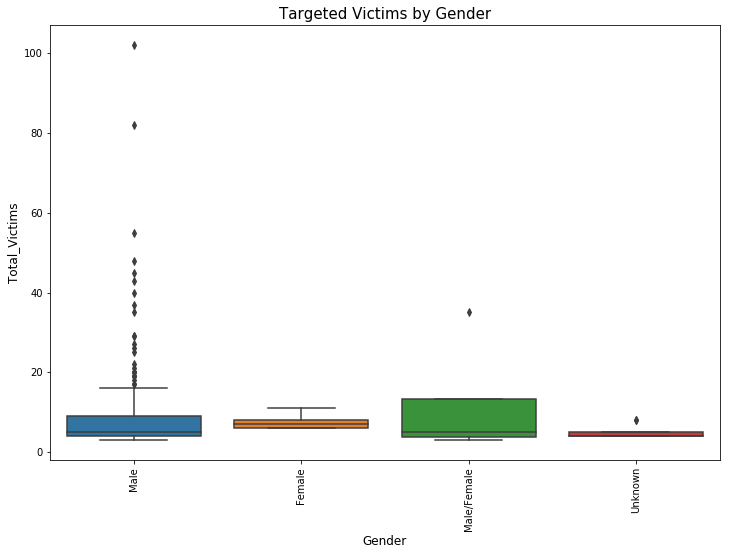

In [217]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Total_victims", data=ms)
plt.ylabel('Total_Victims', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Targeted Victims by Gender", fontsize=15)
plt.show()

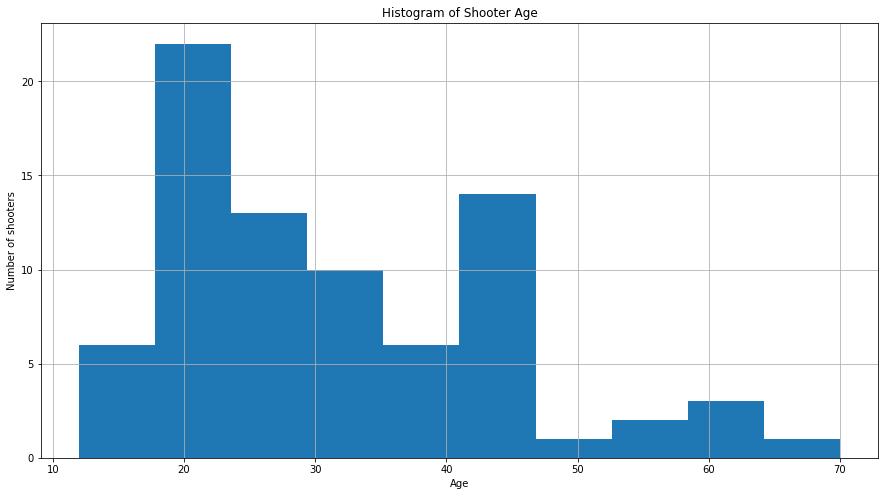

In [151]:
ratio = (15,8)
ages = post.Age.values
sum = []
for i in ages:
    if type(i) == float:
        continue
    s = i.split(',')
    sum.append(s)
flattened = [int(val) for sublist in sum for val in sublist]

fig,ax = plt.subplots(figsize=ratio)
ax.hist(flattened,bins=10)
ax.xaxis.grid(False,'minor') # turn off minor tic grid lines
ax.xaxis.grid(True,'major') # turn on major tic grid lines;
ax.yaxis.grid(False,'minor') # turn off minor tic grid lines
ax.yaxis.grid(True,'major') # turn on major tic grid lines;
plt.xlabel('Age')
plt.ylabel('Number of shooters');
plt.title('Histogram of Shooter Age');

**The age of the gunmen less than 50 accounted for the main proportion.**

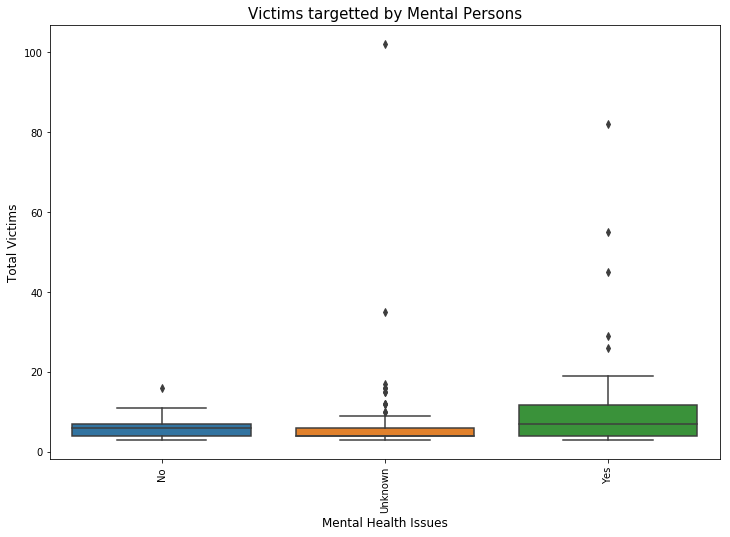

In [225]:
cnt_mental_health = ms['Mental_Health_Issues'].value_counts()
plt.figure(figsize=(12,8))
sns.boxplot(x="Mental_Health_Issues", y="Total_victims", data=post)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=15)
plt.show()

**The Majority of Victims Affected by Shooters Suffering from Mental Health Disorders is between 5-18.**

# **Further Research: **
1. How do mass shootings in the US compare to other countries?
2. Can crime rates be significantly reduced by stricter regulation of firearms ownership and commerce?